In [1]:
# !pip install requests
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# exploring

In [2]:
# Settings for display and style
# pd.set_option('display.max_columns', None)
# sns.set(style="whitegrid")


In [3]:
# Load dataset
df = pd.read_csv('../Data/neso_historic_demand_combined.csv')

In [4]:
# 1. Basic info and preview
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434014 entries, 0 to 434013
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SETTLEMENT_DATE            0 non-null       float64
 1   SETTLEMENT_PERIOD          434014 non-null  int64  
 2   ND                         434014 non-null  int64  
 3   TSD                        363886 non-null  float64
 4   ENGLAND_WALES_DEMAND       434014 non-null  int64  
 5   EMBEDDED_WIND_GENERATION   328846 non-null  float64
 6   EMBEDDED_WIND_CAPACITY     328846 non-null  float64
 7   EMBEDDED_SOLAR_GENERATION  293758 non-null  float64
 8   EMBEDDED_SOLAR_CAPACITY    293758 non-null  float64
 9   NON_BM_STOR                434014 non-null  int64  
 10  PUMP_STORAGE_PUMPING       434014 non-null  int64  
 11  IFA_FLOW                   434014 non-null  int64  
 12  IFA2_FLOW                  293758 non-null  float64
 13  BRITNED_FLOW               29

In [5]:
print(df.head())

   SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND      TSD  ENGLAND_WALES_DEMAND  \
0              NaN                  1  37910  38704.0                 33939   
1              NaN                  1  34221  35837.0                 30659   
2              NaN                  1  36626  38278.0                 32841   
3              NaN                  1  36713  38749.0                 32988   
4              NaN                  1  35293  38323.0                 31847   

   EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
0                      54.0                  1403.0   
1                      62.0                  1403.0   
2                     229.0                  1403.0   
3                     225.0                  1403.0   
4                     358.0                  1403.0   

   EMBEDDED_SOLAR_GENERATION  EMBEDDED_SOLAR_CAPACITY  NON_BM_STOR  ...  \
0                        0.0                      0.0            0  ...   
1                        0.0                

In [6]:
# 2. Check datetime column and parse if needed
# if 'SETTLEMENT_DATE' in df.columns:
#     df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'], errors='coerce')
#     print(df['SETTLEMENT_DATE'].describe())
#     # Visualize over time - count rows per date
#     df['SETTLEMENT_DATE'].value_counts().sort_index().plot(kind='line', figsize=(12,4))
#     plt.title('Counts of records per SETTLEMENT_DATE')
#     plt.ylabel('Number of records')
#     plt.show()

In [7]:
# 3. Summarize missing values
missing_count = df.isnull().sum()
print("Missing values per column:\n", missing_count)

Missing values per column:
 SETTLEMENT_DATE              434014
SETTLEMENT_PERIOD                 0
ND                                0
TSD                           70128
ENGLAND_WALES_DEMAND              0
EMBEDDED_WIND_GENERATION     105168
EMBEDDED_WIND_CAPACITY       105168
EMBEDDED_SOLAR_GENERATION    140256
EMBEDDED_SOLAR_CAPACITY      140256
NON_BM_STOR                       0
PUMP_STORAGE_PUMPING              0
IFA_FLOW                          0
IFA2_FLOW                    140256
BRITNED_FLOW                 140256
MOYLE_FLOW                    70128
EAST_WEST_FLOW               140256
NEMO_FLOW                    140256
NSL_FLOW                     315552
ELECLINK_FLOW                315552
VIKING_FLOW                  315552
GREENLINK_FLOW               315552
SCOTTISH_TRANSFER            385680
dtype: int64


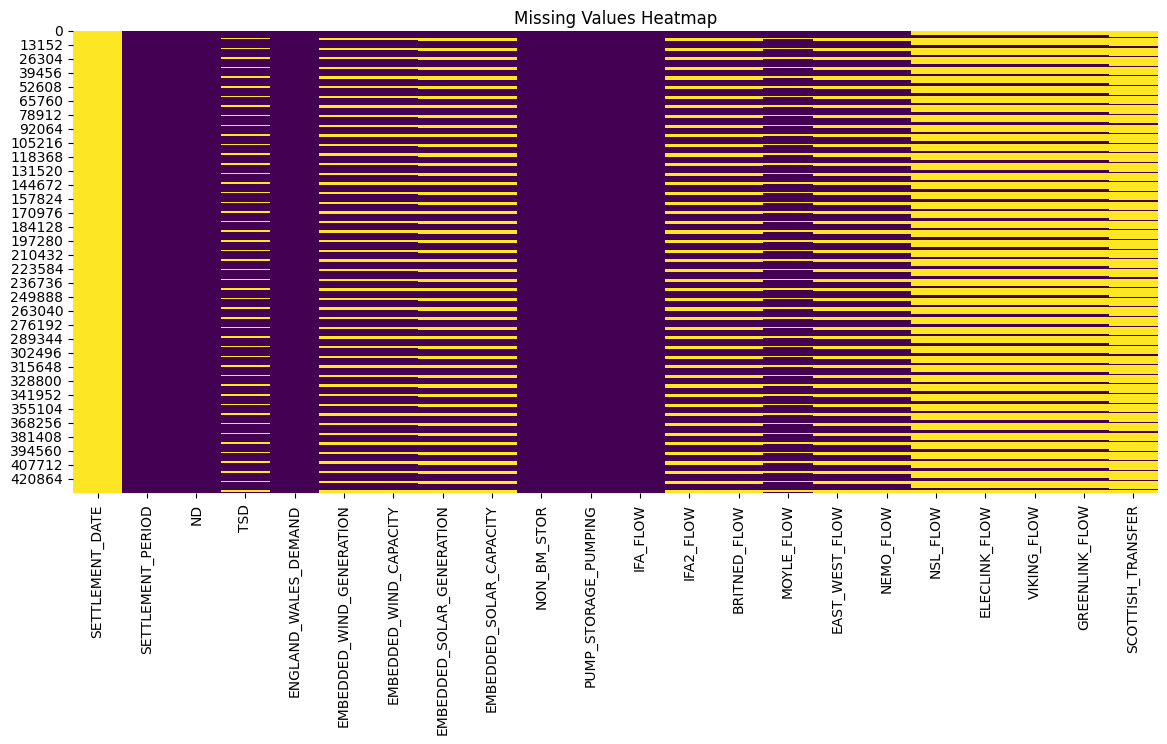

In [8]:

# 4. Visualize missing data heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:

# 5. Separate columns by type
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

Numerical columns: ['SETTLEMENT_DATE', 'SETTLEMENT_PERIOD', 'ND', 'TSD', 'ENGLAND_WALES_DEMAND', 'EMBEDDED_WIND_GENERATION', 'EMBEDDED_WIND_CAPACITY', 'EMBEDDED_SOLAR_GENERATION', 'EMBEDDED_SOLAR_CAPACITY', 'NON_BM_STOR', 'PUMP_STORAGE_PUMPING', 'IFA_FLOW', 'IFA2_FLOW', 'BRITNED_FLOW', 'MOYLE_FLOW', 'EAST_WEST_FLOW', 'NEMO_FLOW', 'NSL_FLOW', 'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW', 'SCOTTISH_TRANSFER']
Categorical columns: []


In [10]:
# 6. Summary stats for numerical columns
print(df[num_cols].describe())

       SETTLEMENT_DATE  SETTLEMENT_PERIOD             ND            TSD  \
count              0.0      434014.000000  434014.000000  363886.000000   
mean               NaN          24.500115   33356.066355   33266.062044   
std                NaN          13.853742    8520.564917    8841.033067   
min                NaN           1.000000   12803.000000       0.000000   
25%                NaN          12.250000   26489.000000   27070.000000   
50%                NaN          24.000000   32976.000000   32728.000000   
75%                NaN          36.000000   39692.000000   39438.000000   
max                NaN          50.000000   60333.000000   60560.000000   

       ENGLAND_WALES_DEMAND  EMBEDDED_WIND_GENERATION  EMBEDDED_WIND_CAPACITY  \
count         434014.000000             328846.000000           328846.000000   
mean           30276.803767               1214.371730             4144.955061   
std             7677.431497               1044.560271             2211.207279   


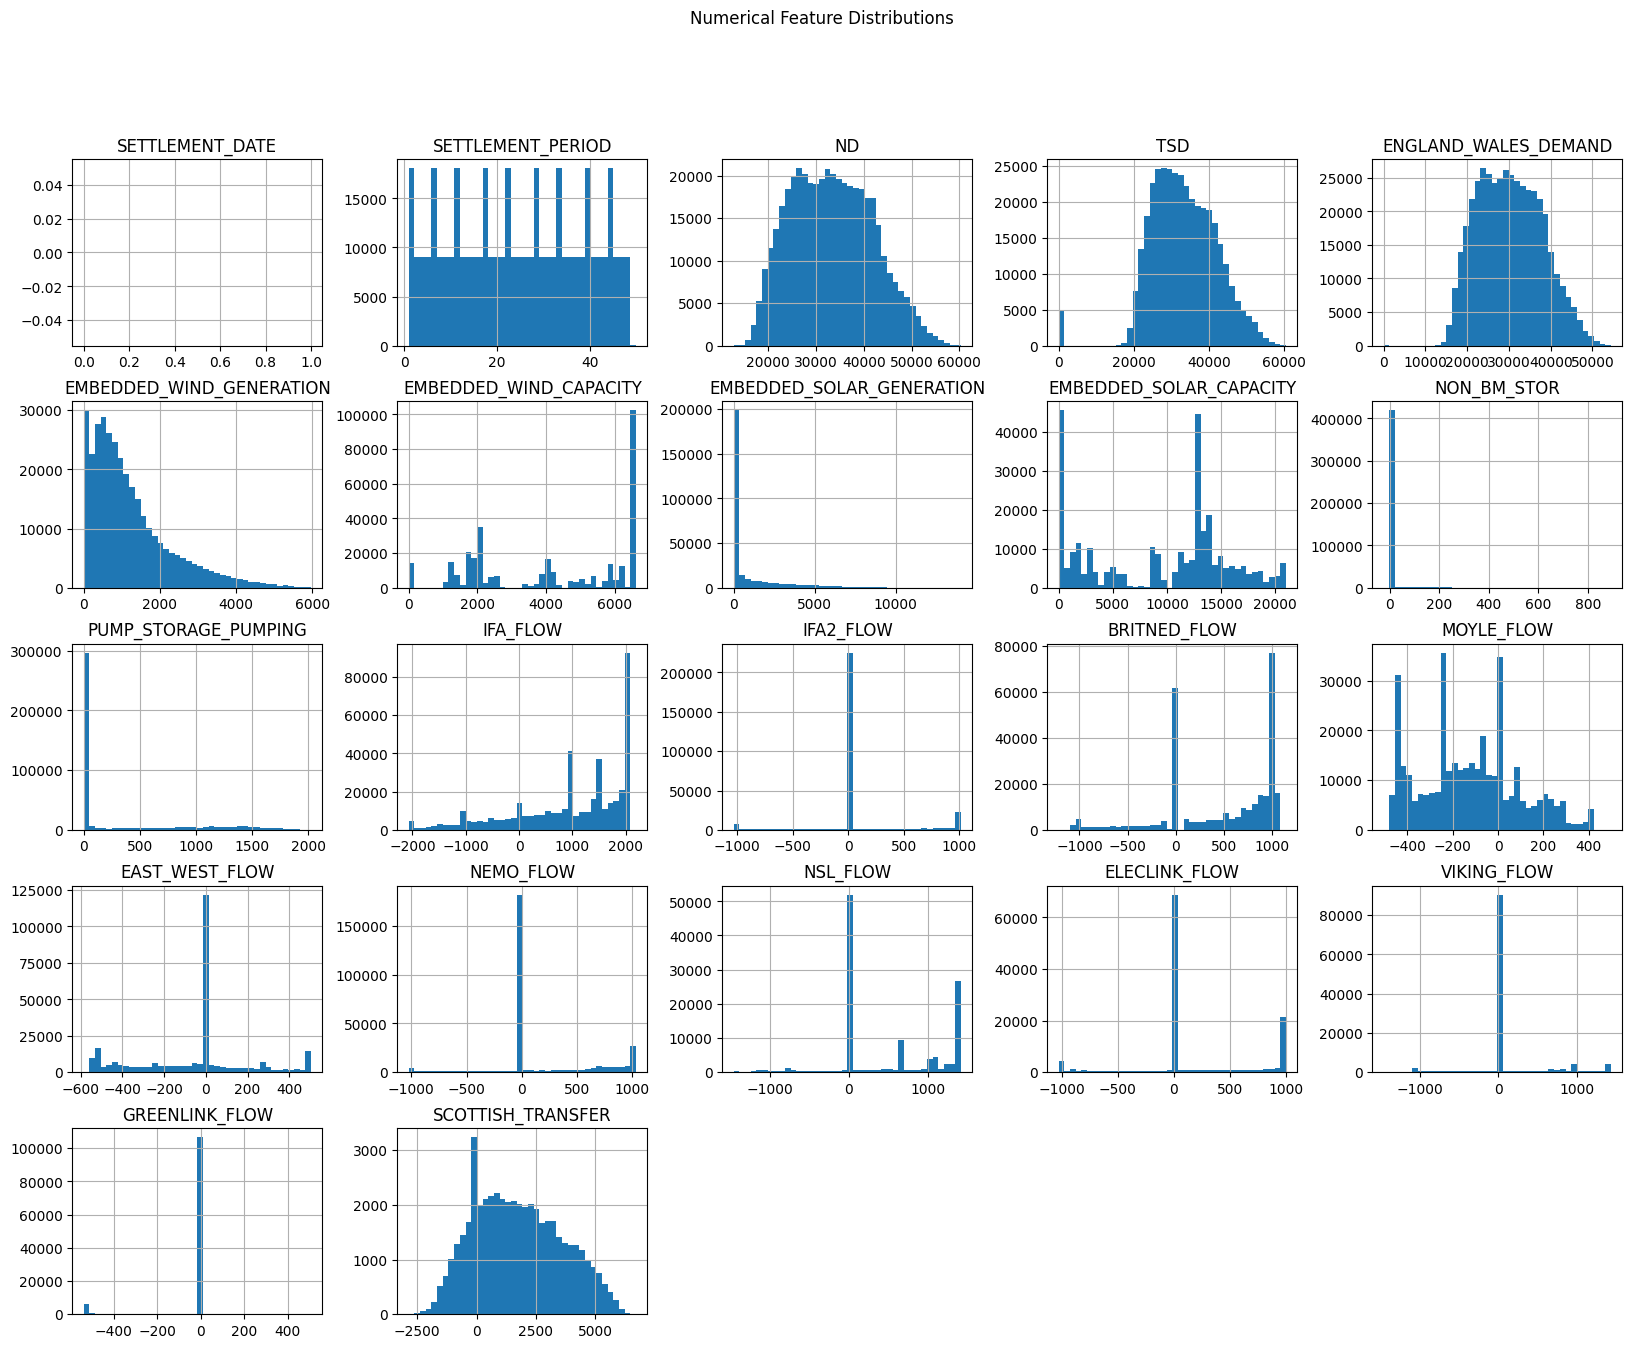

In [11]:
# 7. Histograms for numerical distributions
df[num_cols].hist(bins=40, figsize=(20,15))
plt.suptitle("Numerical Feature Distributions")
plt.show()

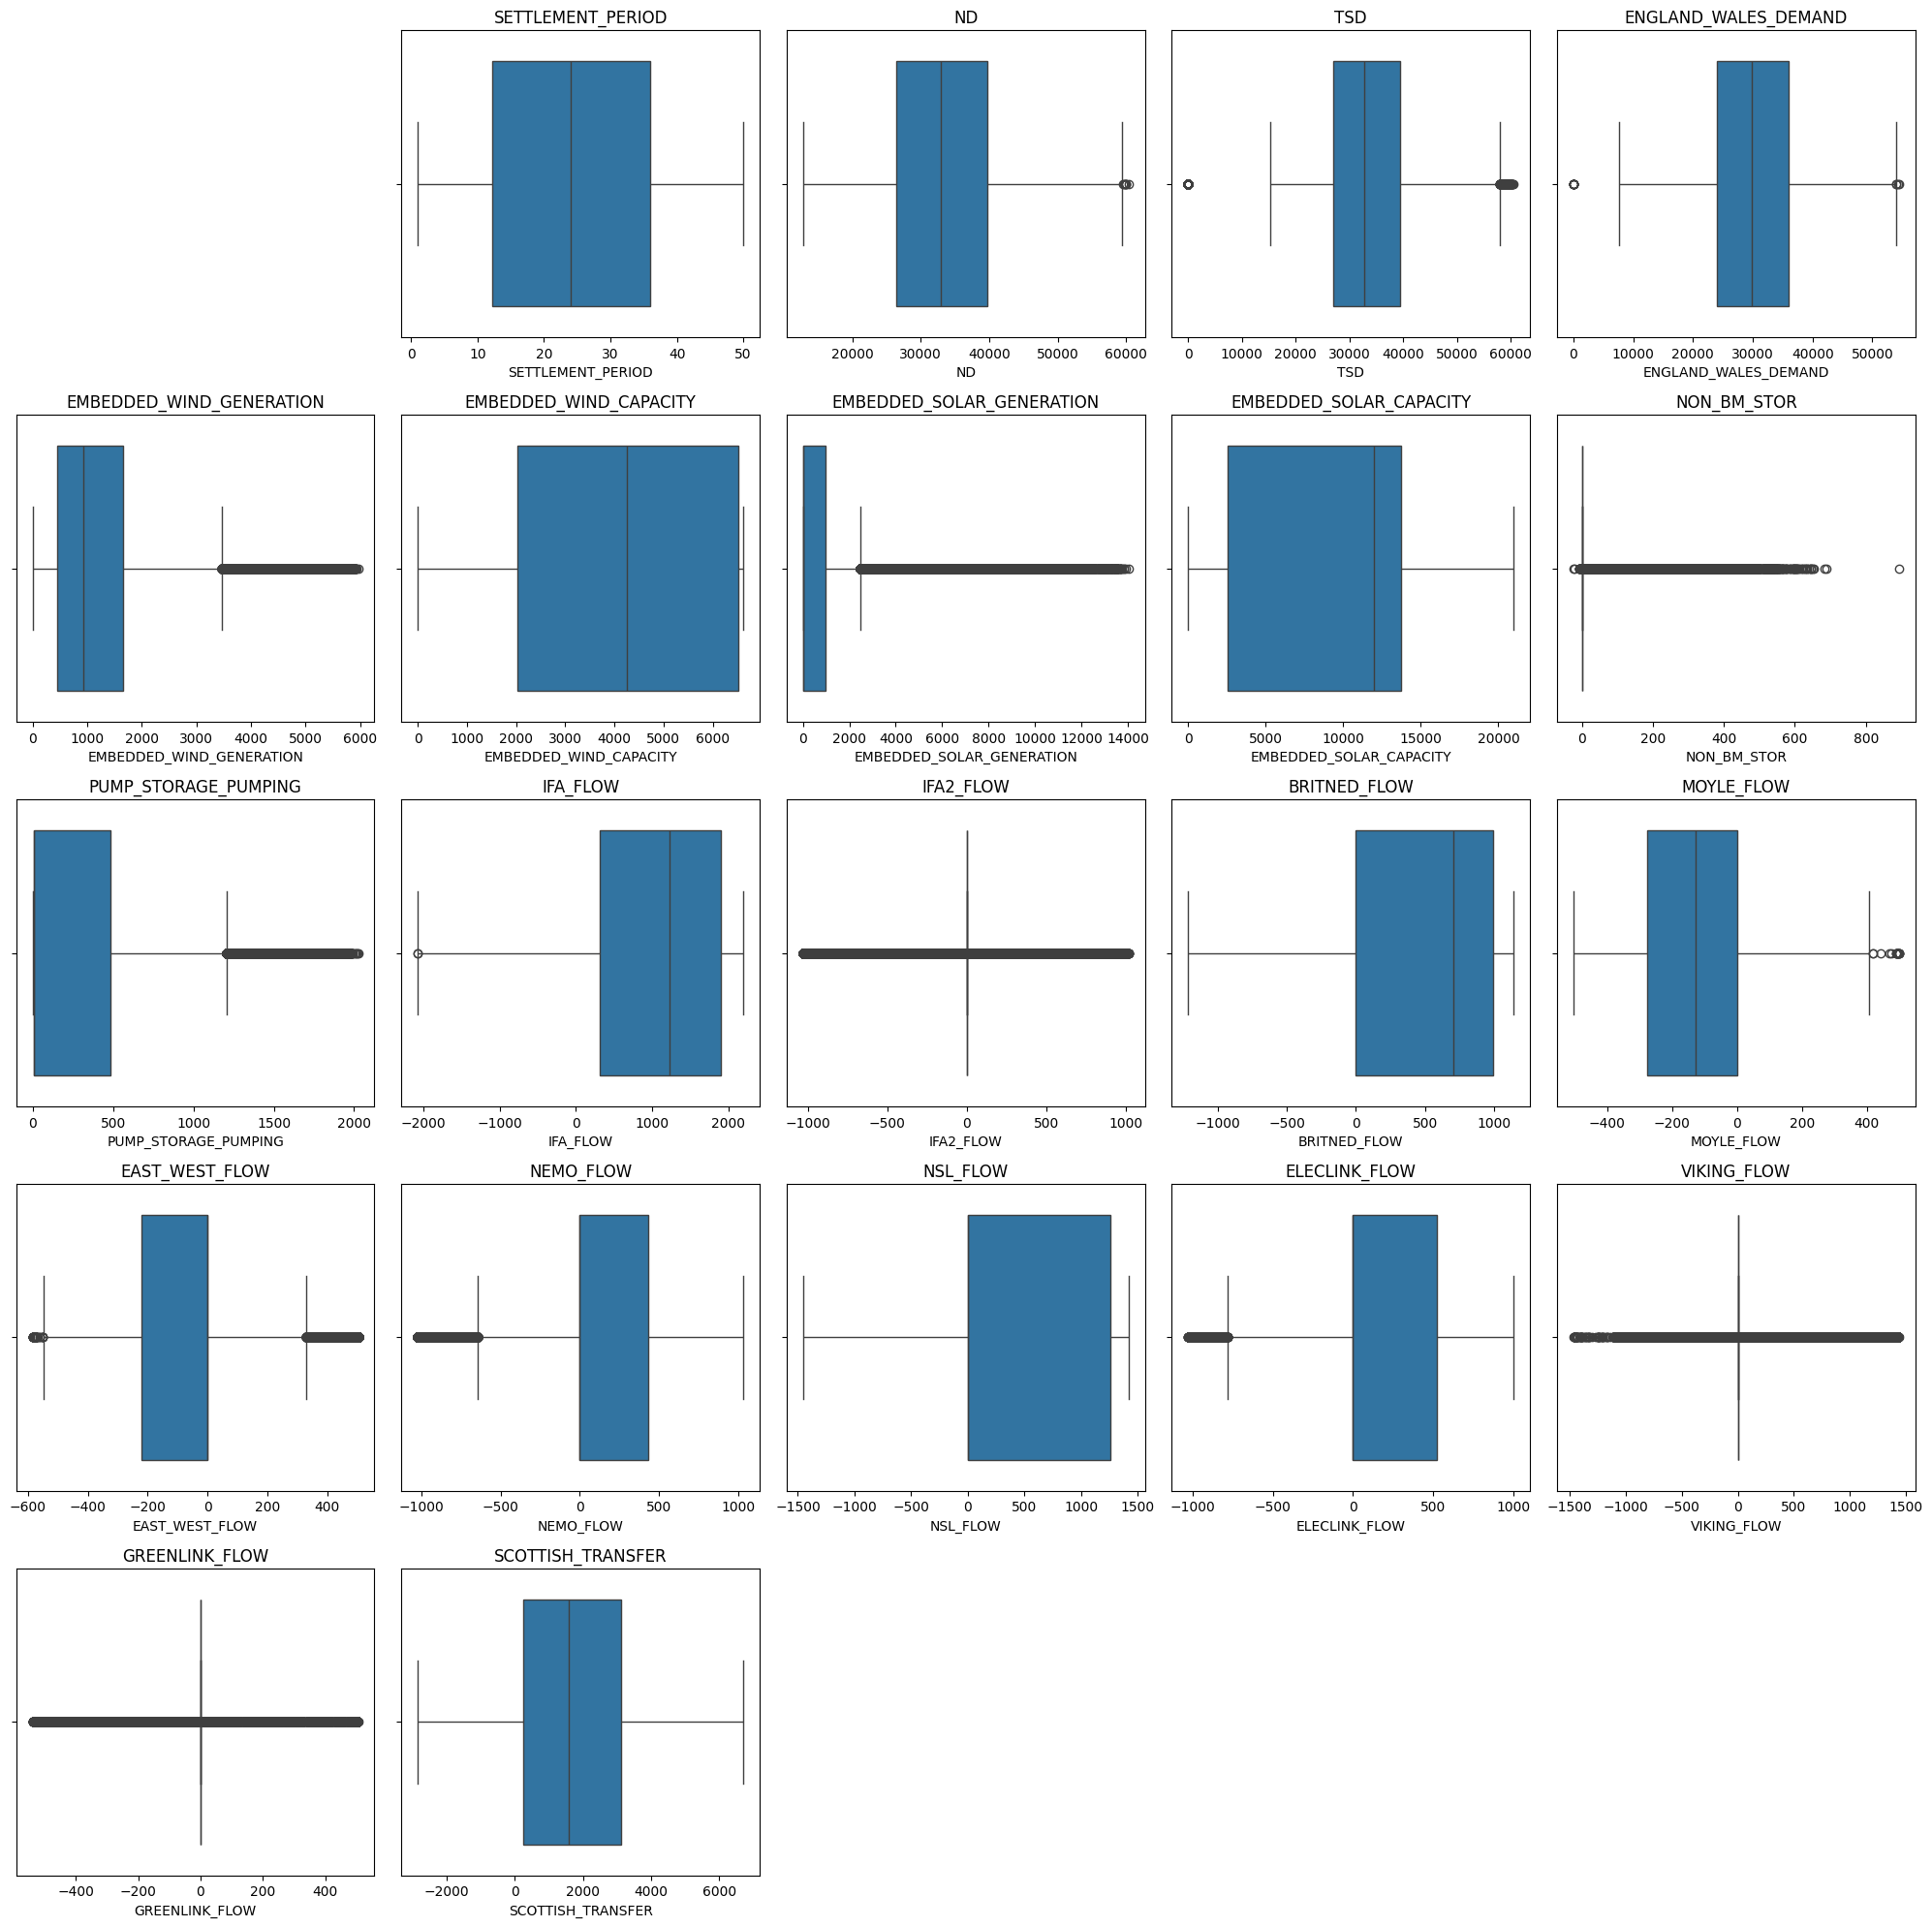

In [12]:
# 8. Boxplots to detect outliers
# plt.figure(figsize=(20,10))
# for i, col in enumerate(num_cols):
#     plt.subplot(3, 5, i+1)
#     sns.boxplot(x=df[col])
#     plt.title(col)
# plt.tight_layout()
# plt.show()

# import math
# import matplotlib.pyplot as plt
# import seaborn as sns

# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# num_plots = len(num_cols)

# # Choose number of columns (e.g., 5) and calculate rows accordingly
# ncols = 5
# nrows = math.ceil(num_plots / ncols)

# plt.figure(figsize=(ncols * 4, nrows * 4))

# for i, col in enumerate(num_cols):
#     plt.subplot(nrows, ncols, i + 1)  # dynamically place subplot
#     sns.boxplot(x=df[col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()


import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)

ncols = 5
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 4, nrows * 4))

for i, col in enumerate(num_cols):
    data = df[col].dropna()  # Drop NaNs for plotting
    # Skip columns if empty after dropping NaNs or if constant
    if data.empty or data.nunique() <= 1:
        continue  # Skip plotting this column
    
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=data)
    plt.title(col)

plt.tight_layout()
plt.show()

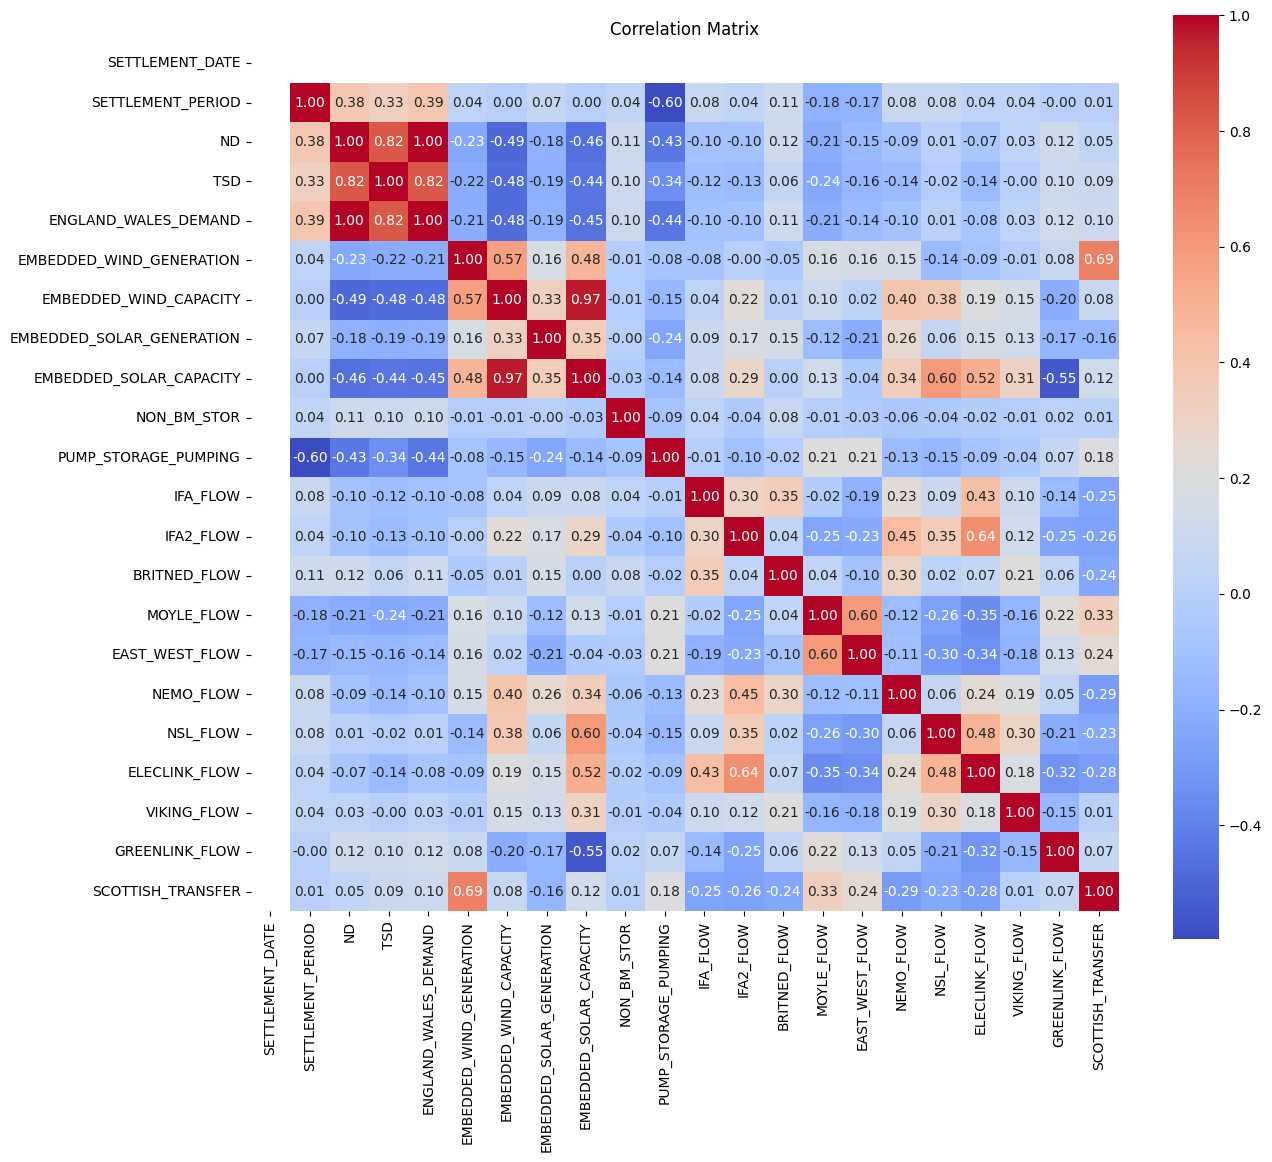

In [13]:
# 9. Correlation matrix among numerical features
plt.figure(figsize=(14,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
10. For categorical (if any), examine unique counts
# for col in cat_cols:
#     print(f"Value counts for {col}:\n{df[col].value_counts(dropna=False)}\n")

# cleaning

In [15]:
# cols_to_drop = ['SETTLEMENT_DATE', 'NSL_FLOW', 'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW', 'SCOTTISH_TRANSFER']
# df_dropped_cols = df.drop(columns=cols_to_drop)

# print(f"Columns dropped: {cols_to_drop}")
# print(f"Remaining columns:\n{df_dropped_cols.columns.tolist()}")

# # 4. Visualize missing data heatmap
# plt.figure(figsize=(14,6))
# sns.heatmap(df_dropped_cols.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()

In [16]:
# 2. Convert SETTLEMENT_DATE to datetime
df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'], errors='coerce')

# 3. Drop redundant/highly correlated or constant columns
redundant = ['ND', 'TSD']  # Keep only ENGLAND_WALES_DEMAND per heatmap
pre_dropped = ['NSL_FLOW', 'ELECLINK_FLOW', 'VIKING_FLOW', 'GREENLINK_FLOW', 'SCOTTISH_TRANSFER']
# Drop near-constant columns automatically
constant_cols = [col for col in df.columns if df[col].nunique(dropna=True) <= 1]
cols_to_drop = list(set(redundant + pre_dropped + constant_cols))
df = df.drop(columns=cols_to_drop)

print(f"Columns dropped: {cols_to_drop}")

# 4. Drop columns with >50% missing data
missing_threshold = 0.5
missing_pct = df.isnull().mean()
high_missing = missing_pct[missing_pct > missing_threshold].index.tolist()
df = df.drop(columns=high_missing)
print(f"Dropped columns with >50% missing: {high_missing}")

# 5. Impute remaining missing values: median for numeric, mode for categorical
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode(dropna=True)[0])

# 6. Outlier treatment: Remove points >4*IQR, then cap at 0.5th and 99.5th percentiles
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 4 * IQR
    upper = Q3 + 4 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    # Cap remaining values for robustness
    lower_cap = df[col].quantile(0.005)
    upper_cap = df[col].quantile(0.995)
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

# 7. Feature engineering: Add month, day of week, etc.
if 'SETTLEMENT_DATE' in df.columns:
    df['month'] = df['SETTLEMENT_DATE'].dt.month
    df['day_of_week'] = df['SETTLEMENT_DATE'].dt.dayofweek

# 8. Remove multicollinearity: Drop extra columns with corr >0.95 (optional, can be manual)
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(columns=to_drop_corr)
print(f"Dropped columns with corr > 0.95: {to_drop_corr}")

# 9. Save cleaned/feature-engineered data
df.to_csv('cleaned_electricity_data.csv', index=False)
print("Cleaned data saved as cleaned_electricity_data.csv")

Columns dropped: ['GREENLINK_FLOW', 'VIKING_FLOW', 'ELECLINK_FLOW', 'ND', 'SCOTTISH_TRANSFER', 'NSL_FLOW', 'TSD', 'SETTLEMENT_DATE']
Dropped columns with >50% missing: []
Dropped columns with corr > 0.95: []
Cleaned data saved as cleaned_electricity_data.csv


----------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159596 entries, 0 to 159595
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SETTLEMENT_PERIOD          159596 non-null  int64  
 1   ENGLAND_WALES_DEMAND       159596 non-null  float64
 2   EMBEDDED_WIND_GENERATION   159596 non-null  float64
 3   EMBEDDED_WIND_CAPACITY     159596 non-null  float64
 4   EMBEDDED_SOLAR_GENERATION  159596 non-null  float64
 5   EMBEDDED_SOLAR_CAPACITY    159596 non-null  float64
 6   NON_BM_STOR                159596 non-null  int64  
 7   PUMP_STORAGE_PUMPING       159596 non-null  int64  
 8   IFA_FLOW                   159596 non-null  int64  
 9   IFA2_FLOW                  159596 non-null  float64
 10  BRITNED_FLOW               159596 non-null  float64
 11  MOYLE_FLOW  

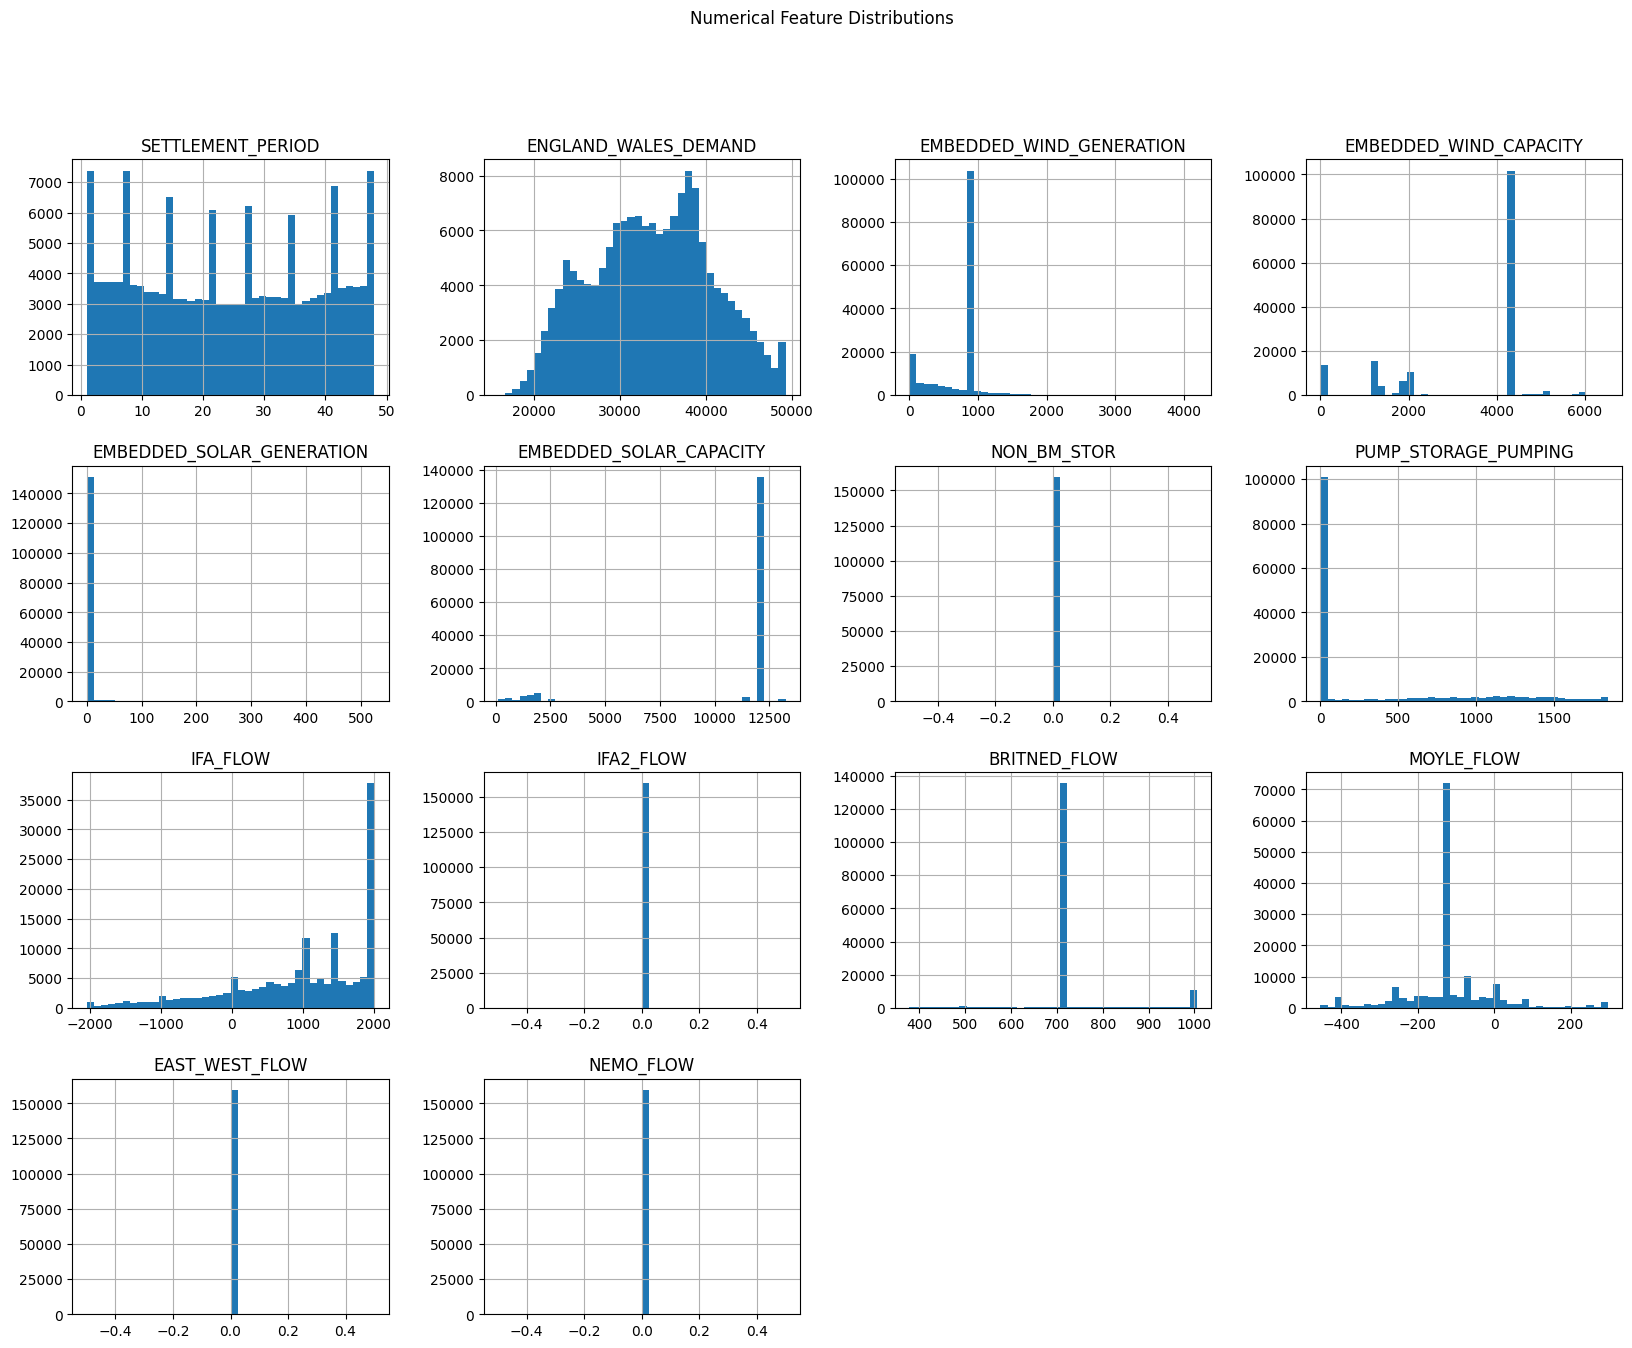

----------------------------------------------------------------------------------------------------------------------------------


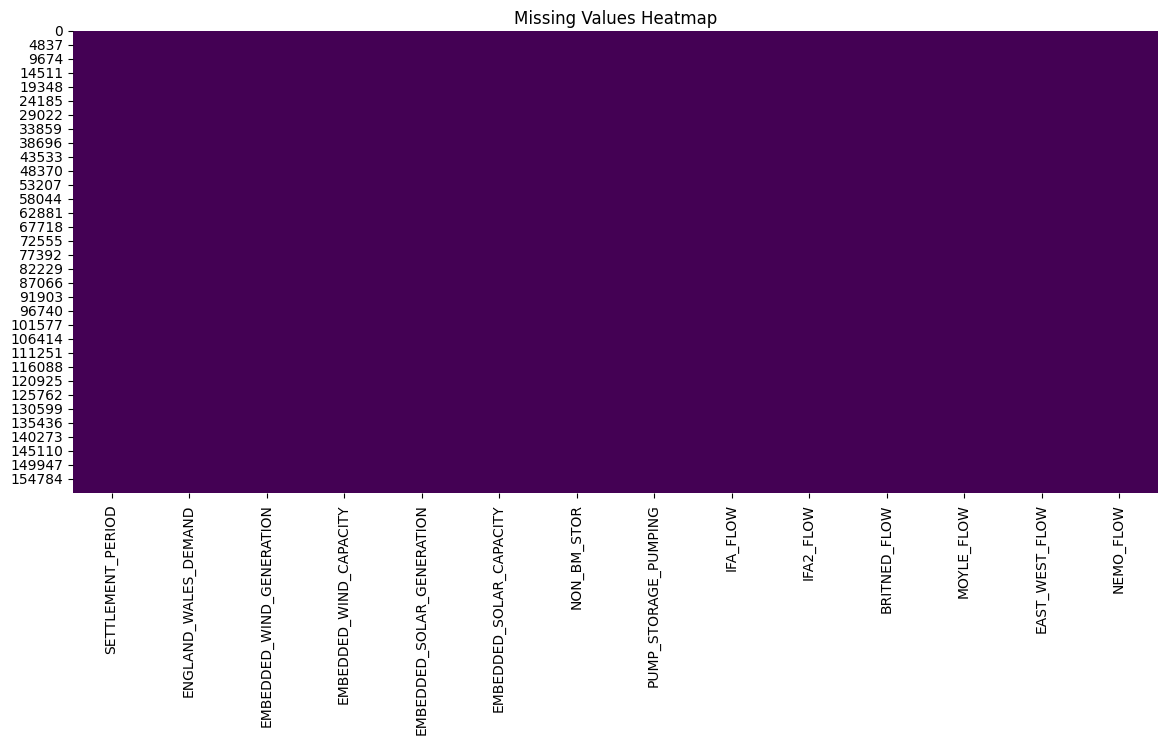

----------------------------------------------------------------------------------------------------------------------------------


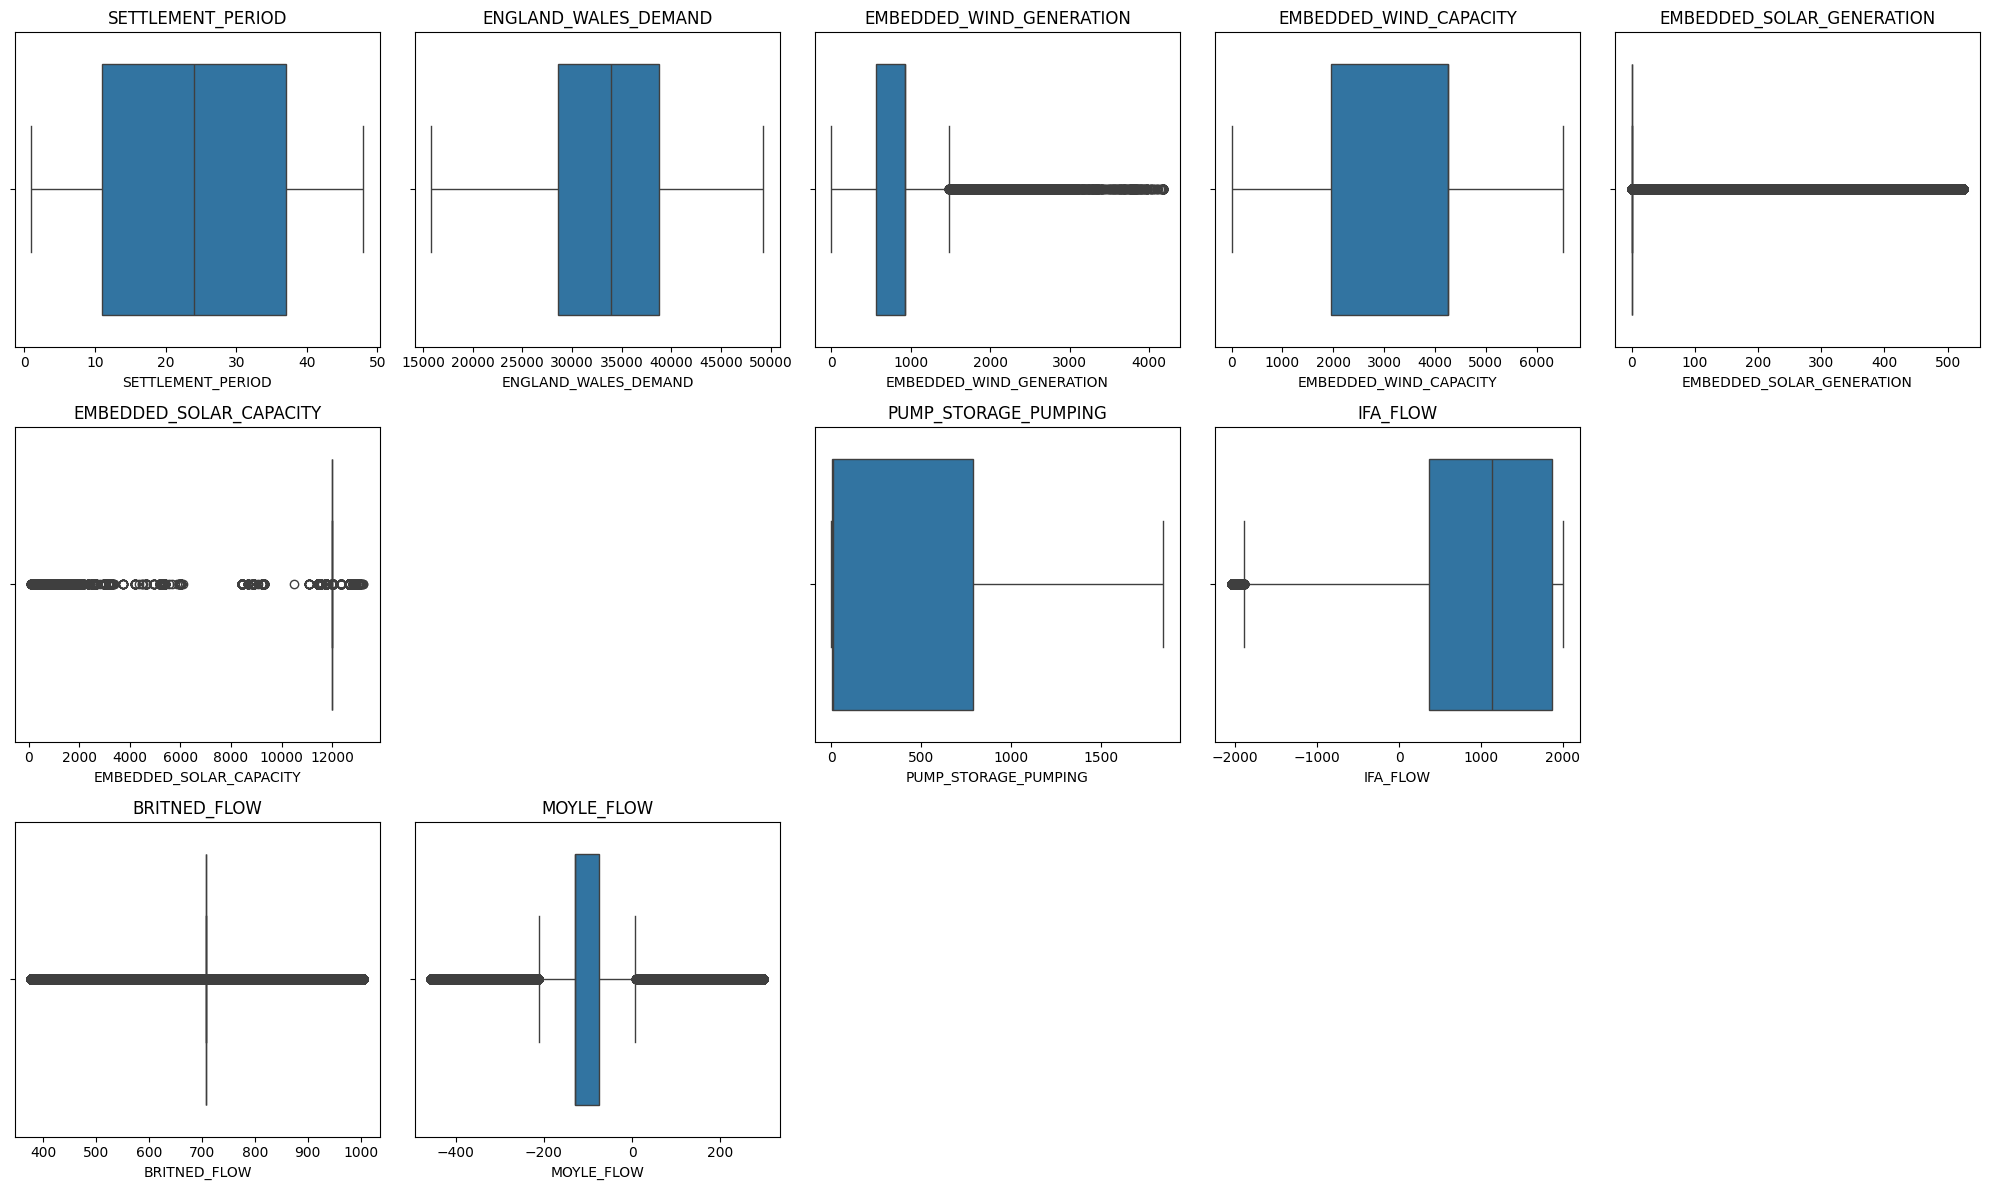

----------------------------------------------------------------------------------------------------------------------------------


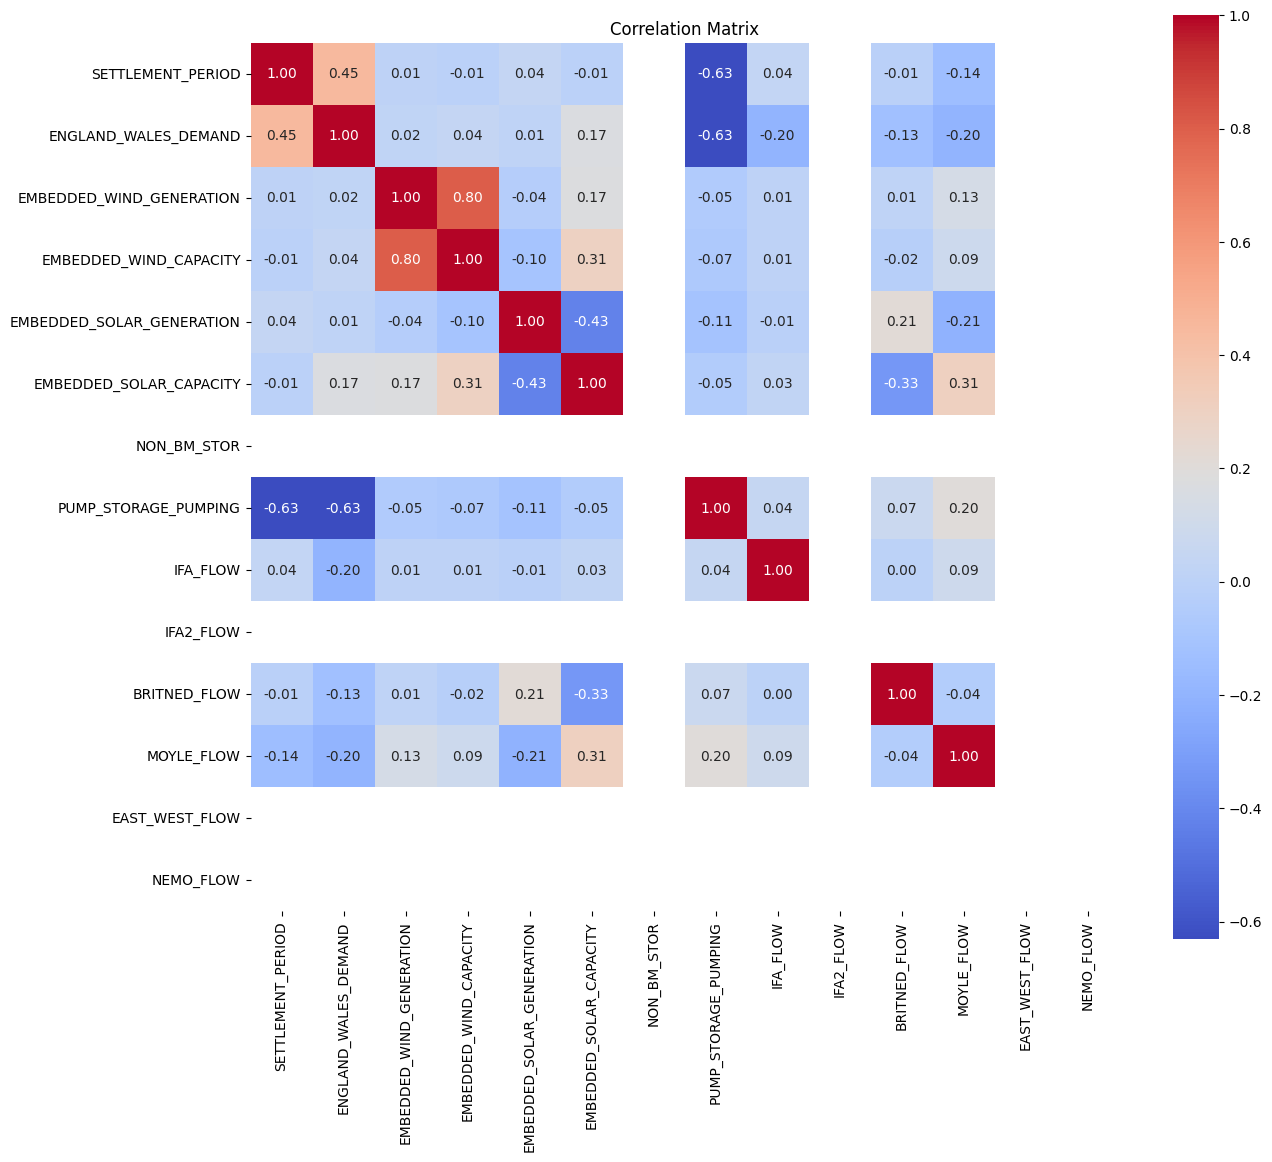

In [18]:
df_cleaned = pd.read_csv('cleaned_electricity_data.csv')
print("----------------------------------------------------------------------------------------------------------------------------------")
print(df_cleaned.info())
print(df_cleaned.head())

print("----------------------------------------------------------------------------------------------------------------------------------")
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

print(f"Numerical columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

print("----------------------------------------------------------------------------------------------------------------------------------")
# 6. Summary stats for numerical columns
print(df_cleaned[num_cols].describe())

print("----------------------------------------------------------------------------------------------------------------------------------")

# 7. Histograms for numerical distributions
df_cleaned[num_cols].hist(bins=40, figsize=(20,15))
plt.suptitle("Numerical Feature Distributions")
plt.show()

print("----------------------------------------------------------------------------------------------------------------------------------")

# 4. Visualize missing data heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

print("----------------------------------------------------------------------------------------------------------------------------------")

import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)

ncols = 5
nrows = math.ceil(num_plots / ncols)

plt.figure(figsize=(ncols * 4, nrows * 4))

for i, col in enumerate(num_cols):
    data = df[col].dropna()  # Drop NaNs for plotting
    # Skip columns if empty after dropping NaNs or if constant
    if data.empty or data.nunique() <= 1:
        continue  # Skip plotting this column
    
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=data)
    plt.title(col)

plt.tight_layout()
plt.show()


print("----------------------------------------------------------------------------------------------------------------------------------")



# 9. Correlation matrix among numerical features
plt.figure(figsize=(14,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
